Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


To download the dataset, use the link given below. 
Downlaod Files:

    https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import zscore

In [2]:
df=pd.read_csv('Census Income Project.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

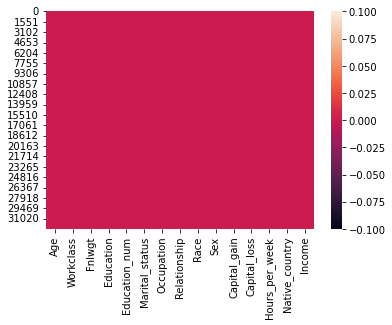

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
for i in df.select_dtypes(['object']).columns:
    print(i,':',df[i].unique())

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Relationship : [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex : [' Male' ' Female']
Native_country : [' United-States' ' Cuba' ' Ja

# Graphical Relations

<AxesSubplot:xlabel='Age', ylabel='count'>

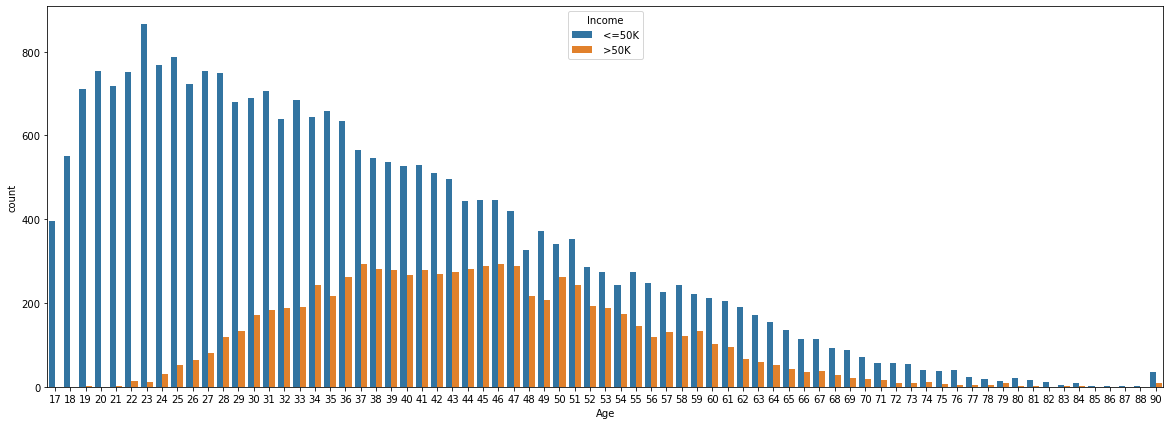

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['Age'], hue=df['Income'])

<AxesSubplot:xlabel='Education_num', ylabel='count'>

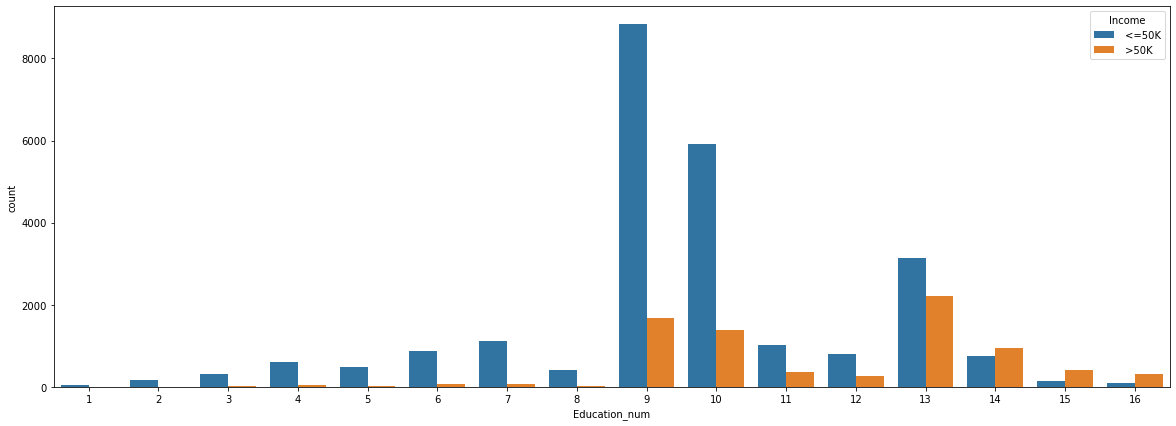

In [10]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['Education_num'], hue=df['Income'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

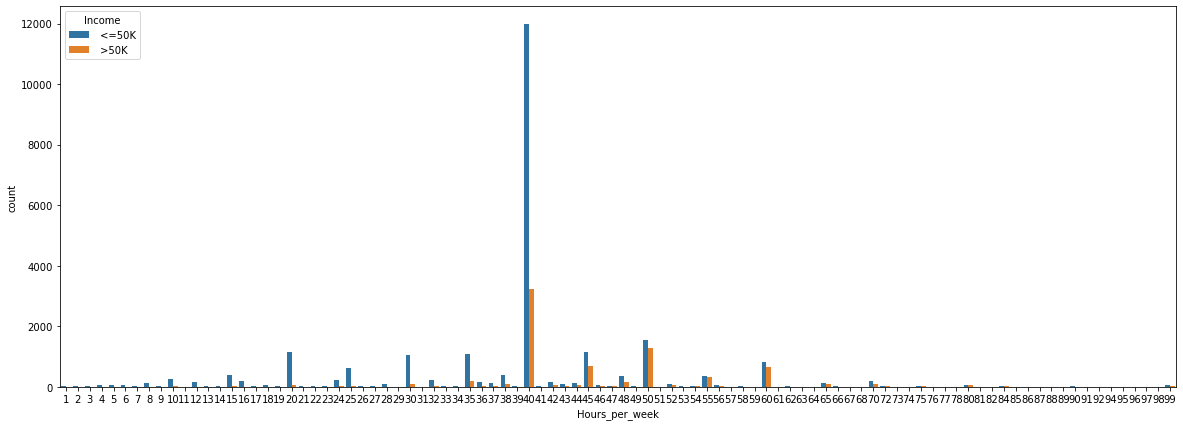

In [11]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['Hours_per_week'], hue=df['Income'])

<AxesSubplot:xlabel='count', ylabel='Occupation'>

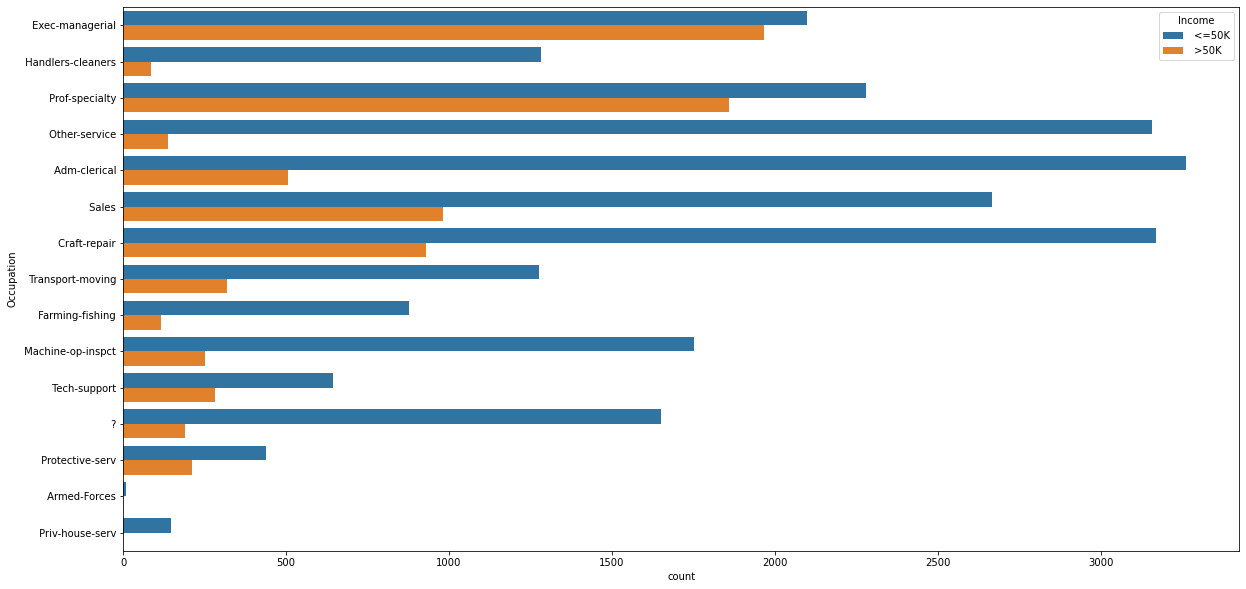

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(y=df['Occupation'], hue=df['Income'])

<AxesSubplot:xlabel='Education', ylabel='count'>

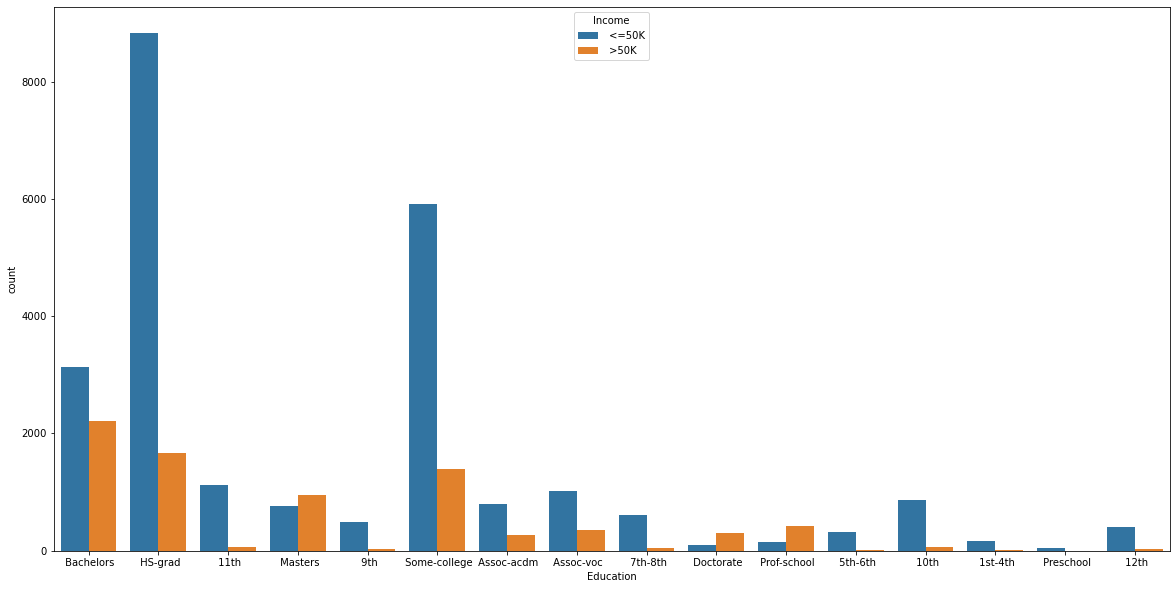

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Education'], hue=df['Income'])

<AxesSubplot:xlabel='Workclass', ylabel='count'>

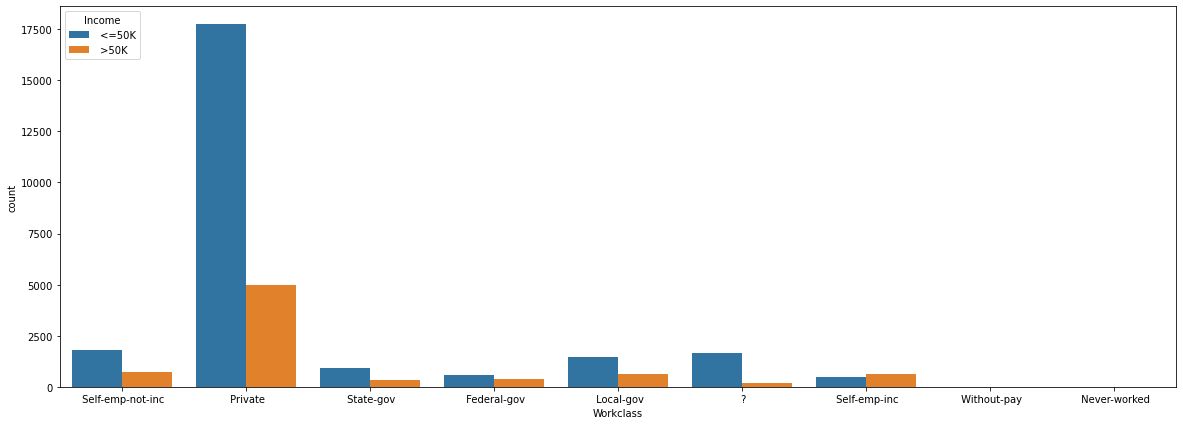

In [14]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['Workclass'], hue=df['Income'])

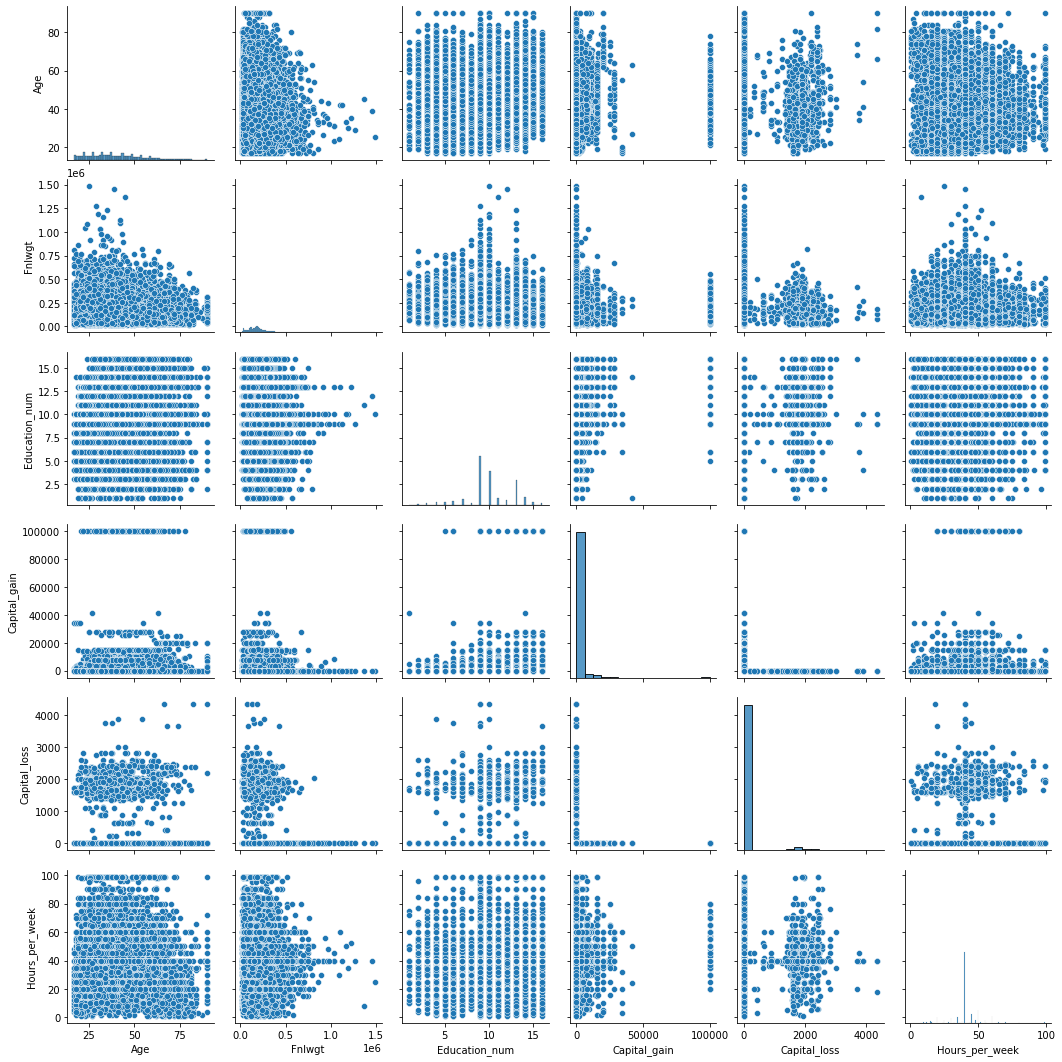

In [15]:
sns.pairplot(df)

# Applying Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in col:
    df[i]=le.fit_transform(df[i])

# Data Discription

In [17]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


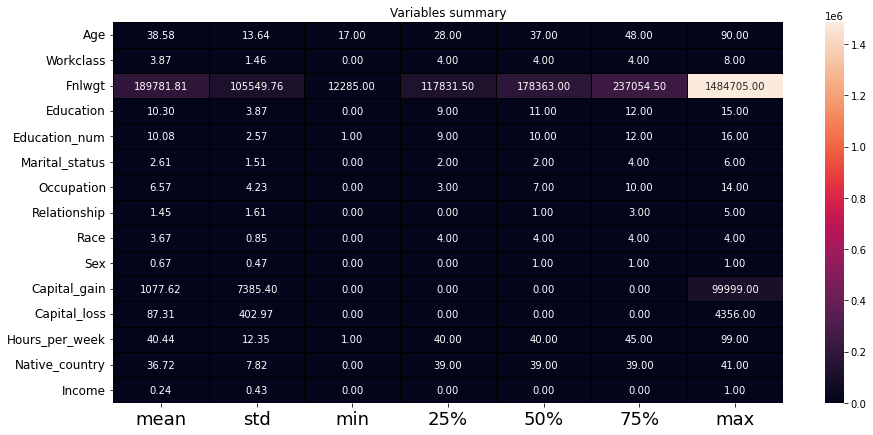

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variables summary')
plt.savefig('heatmap.png')
plt.show()

# Correlation

In [19]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

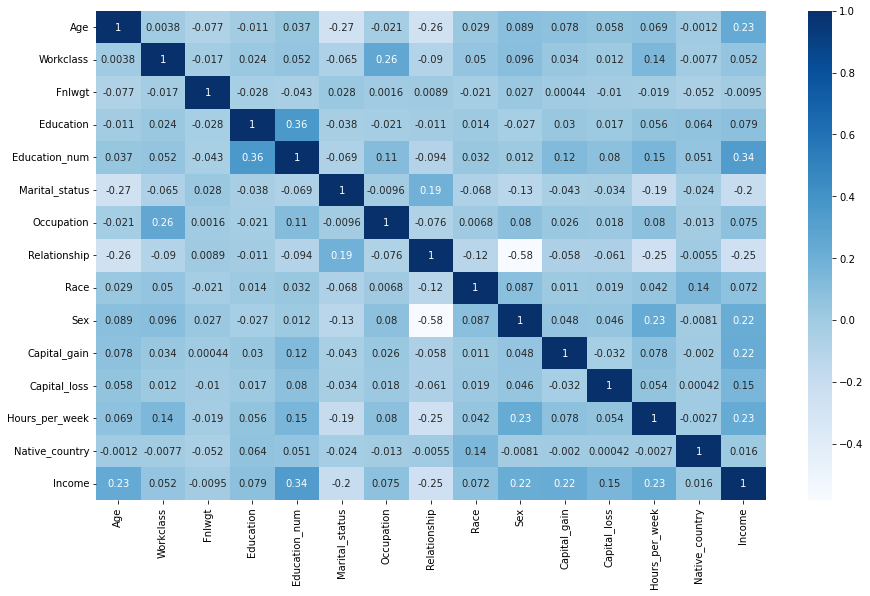

In [20]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [21]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

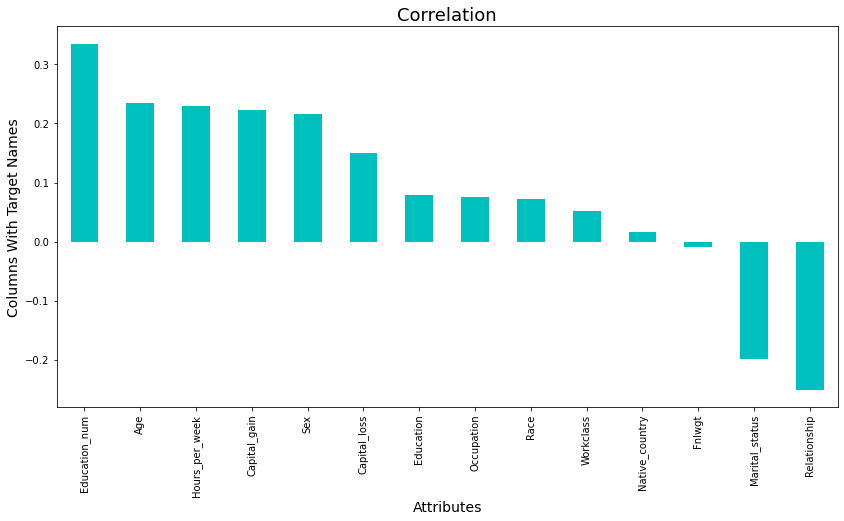

In [22]:
plt.figure(figsize=(14,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Unneeded Features
- 'Fnlwgt' means Final Weight, it does not effect the income.

In [23]:
df.drop('Fnlwgt',axis=1,inplace=True)

In [24]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0


In [25]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

# Outliers

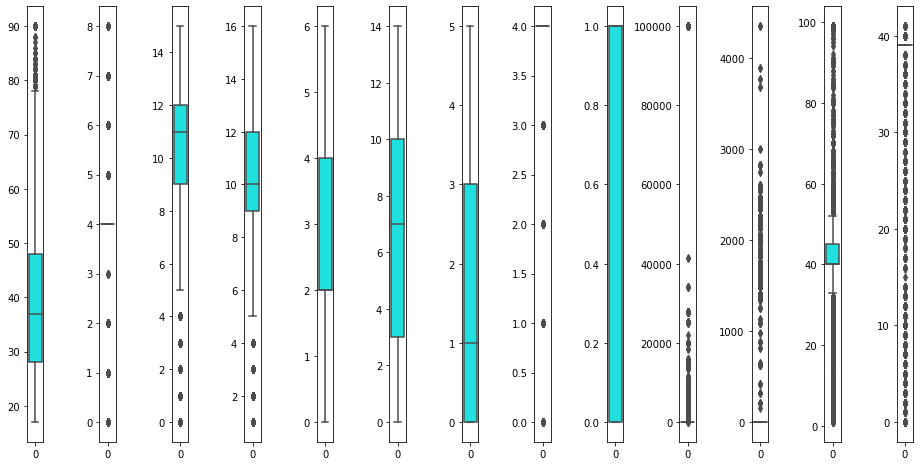

In [26]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.tight_layout()

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:11]))
z.shape

(32560, 11)

In [28]:
threshold=3
np.where(z>3)

(array([   10,    13,    14, ..., 32532, 32550, 32552], dtype=int64),
 array([7, 7, 7, ..., 7, 7, 7], dtype=int64))

In [29]:
len(np.where(z>3)[0])

3375

In [30]:
df_new=df[(z<3).all(axis=1)]

In [31]:
x=df_new.drop(['Income'],axis=1)
y=df_new['Income']

In [32]:
# Percentage of Data Loss
((len(df)-len(df_new))*100)/len(df)

10.027641277641278

# Min-Max Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_new=scale.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

# Checking Skewness

In [34]:
x.skew()

Age                0.490654
Workclass         -0.754743
Education         -0.944377
Education_num     -0.163929
Marital_status    -0.042358
Occupation         0.124743
Relationship       0.756174
Race              -2.553452
Sex               -0.691558
Capital_gain       4.935635
Capital_loss      29.692570
Hours_per_week     0.222539
Native_country    -4.022489
dtype: float64

<AxesSubplot:xlabel='Race', ylabel='Density'>

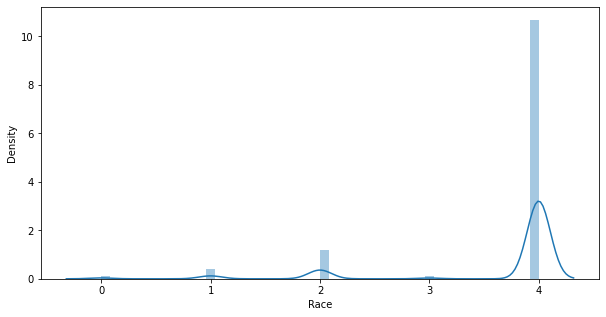

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(df['Race'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

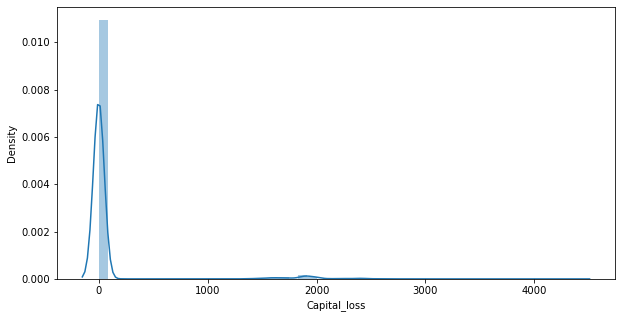

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(df['Capital_loss'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

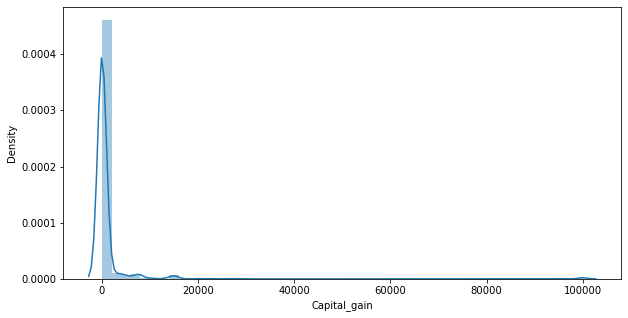

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

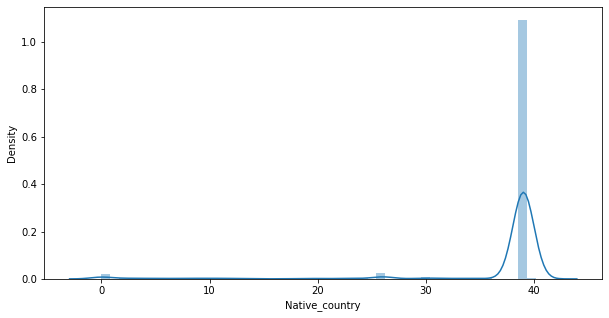

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(df['Native_country'])

In [39]:
#Skewness for Capital_loss is too high 
x.drop(['Capital_loss'], axis=1, inplace=True)
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.532258,0.75,0.600000,0.769231,0.333333,0.285714,0.0,1.0,1.0,0.0,0.122449,0.951220
1,0.338710,0.50,0.733333,0.461538,0.000000,0.428571,0.2,1.0,1.0,0.0,0.397959,0.951220
2,0.580645,0.50,0.066667,0.307692,0.333333,0.428571,0.0,0.0,1.0,0.0,0.397959,0.951220
3,0.177419,0.50,0.600000,0.769231,0.333333,0.714286,1.0,0.0,0.0,0.0,0.397959,0.121951
4,0.322581,0.50,0.800000,0.846154,0.333333,0.285714,1.0,1.0,0.0,0.0,0.397959,0.951220


In [40]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x.skew()

Age               0.028604
Workclass         0.117751
Education        -0.113805
Education_num     0.016645
Marital_status   -0.038261
Occupation       -0.029945
Relationship      0.233350
Race             -2.483427
Sex              -0.691558
Capital_gain      3.078432
Hours_per_week    0.056403
Native_country   -2.989629
dtype: float64

# Selecting Best Model

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    dt.fit(x_train,y_train)
    preddt=dt.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Best accuracy:  81.81321682140906  on Random State:  91
[[5019  674]
 [ 684  947]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5693
           1       0.58      0.58      0.58      1631

    accuracy                           0.81      7324
   macro avg       0.73      0.73      0.73      7324
weighted avg       0.81      0.81      0.81      7324



In [44]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8094555384877966


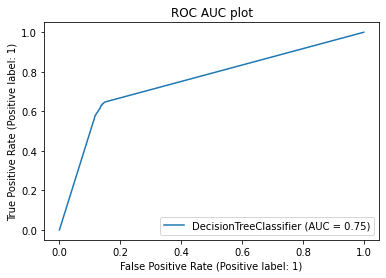

In [45]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Best accuracy:  85.40415073730202  on Random State:  59
[[5245  448]
 [ 668  963]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5693
           1       0.68      0.59      0.63      1631

    accuracy                           0.85      7324
   macro avg       0.78      0.76      0.77      7324
weighted avg       0.84      0.85      0.84      7324



In [47]:
scr=cross_val_score(rf,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.845331967912613


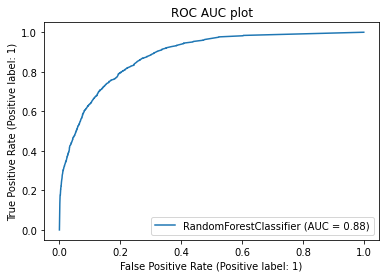

In [48]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    kn.fit(x_train,y_train)
    predkn=kn.predict(x_test)
    acc=accuracy_score(y_test,predkn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Best accuracy:  83.41070453304205  on Random State:  45
[[5129  564]
 [ 708  923]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5693
           1       0.62      0.57      0.59      1631

    accuracy                           0.83      7324
   macro avg       0.75      0.73      0.74      7324
weighted avg       0.82      0.83      0.82      7324



In [50]:
scr=cross_val_score(kn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8252602833247995


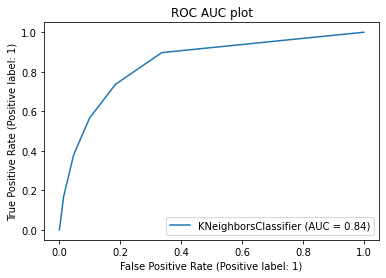

In [51]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(kn,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# SVC

In [52]:
from sklearn.svm import SVC
sv=SVC(kernel='poly')
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    sv.fit(x_train,y_train)
    predsv=sv.predict(x_test)
    acc=accuracy_score(y_test,predsv)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Best accuracy:  84.66684871654834  on Random State:  86
[[5336  357]
 [ 847  784]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5693
           1       0.69      0.48      0.57      1631

    accuracy                           0.84      7324
   macro avg       0.78      0.71      0.73      7324
weighted avg       0.82      0.84      0.82      7324



In [53]:
scr=cross_val_score(sv,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8366615463389657


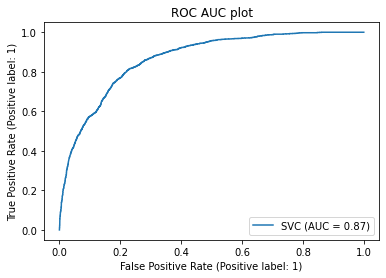

In [54]:
plot_roc_curve(sv,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Best accuracy:  83.35608956854178  on Random State:  30
[[5358  335]
 [ 919  712]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      5693
           1       0.68      0.44      0.53      1631

    accuracy                           0.83      7324
   macro avg       0.77      0.69      0.71      7324
weighted avg       0.81      0.83      0.81      7324



In [57]:
scr=cross_val_score(lr,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.827342549923195


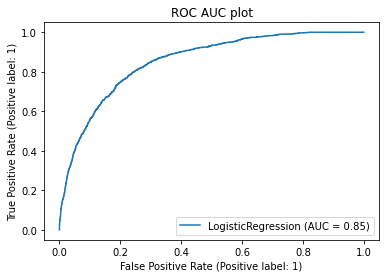

In [58]:
plot_roc_curve(lr,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Gaussian Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    gn.fit(x_train,y_train)
    predgn=gn.predict(x_test)
    acc=accuracy_score(y_test,predgn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

Best accuracy:  79.80611687602403  on Random State:  80
[[4644 1049]
 [ 449 1182]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5693
           1       0.53      0.72      0.61      1631

    accuracy                           0.80      7324
   macro avg       0.72      0.77      0.74      7324
weighted avg       0.83      0.80      0.81      7324



In [60]:
scr=cross_val_score(gn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7907492746202422


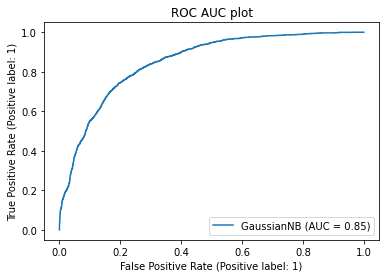

In [61]:
plot_roc_curve(gn,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [62]:
import joblib
joblib.dump(rf,'Census Income Model.pkl')

['Census Income Model.pkl']